<a href="https://colab.research.google.com/github/amirali200080/multilabel_text_classification/blob/main/multi_label_text_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multi-label text classification

**Author:** [Farrokh Karimi](https://farrokhkarimi.github.io/)  
**Description:** In this notebook, we want to classify the Ronash dataset into 20 category.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re
import tensorflow as tf

from collections import Counter
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers

In [2]:
# downloading Data from the Google Drive link
!gdown 1Yq3XTnACkvaIiNlhX09Zth55nOau7jQy

Downloading...
From: https://drive.google.com/uc?id=1Yq3XTnACkvaIiNlhX09Zth55nOau7jQy
To: /content/Ronash_DS_Assignment.csv
100% 1.05M/1.05M [00:00<00:00, 105MB/s]


In [3]:
ls

Ronash_DS_Assignment.csv  sample_data/


In [4]:
# reading the csv file as a dataframe
df = pd.read_csv('Ronash_DS_Assignment.csv')
df

,product_id,title,vendor,tags,category
0,3937721221199,Fidele Super Premium Adult Large Breed Dog Food,Fidele,"['Adult', 'Bangalore', 'Chennai', 'Chicken', '...",Animals & Pet Supplies
1,7353058033889,Foldable Pet Toys Linen Storage,Cap Point,[],Animals & Pet Supplies
2,6594773549129,Bok Dok Diaper,Pets Home,"['Brand_Pet Arabia', 'Category_Pets Home', 'Ca...",Animals & Pet Supplies
3,4802008318014,Tastybone Toy Chicken,TastyBone,[],Animals & Pet Supplies
4,1779705151539,Leather Leash Tab - Short Dog Leash,Mighty Paw,"['Leash', 'Leash Tab', 'Training']",Animals & Pet Supplies
...,...,...,...,...,...
5265,4637089464407,Candylab MOO Milk Van,Candylab,"['3 Years +', 'candylab', 'Discount Products',...",Vehicles & Parts
5266,4996632444987,"Truck - Modern Era Vehicles -- Red, White - S...",Woodland Scenics,"['HO Scale', 'ho-scale-items', 'vehicles', 'wo...",Vehicles & Parts
5267,5528541003927,Car Sticker Flags Decal American Flag Sticker for,Cyan Selene,['Other'],Vehicles & Parts
5268,1395163889730,Lazer Helmets Bayamo Pit Bull - Full Face,OPEN BOX BARGAINS,"['65061090', 'Antiscratch Pinlock Ready Visor'...",Vehicles & Parts


In [6]:
# remove smallest labels
mask = df['category'] == 'Religious & Ceremonial'
df = df[~mask]
mask = df['category'] == 'Software'
df = df[~mask]
mask = df['category'] == 'Hardware'
df = df[~mask]
mask = df['category'] == 'Cameras & Optics'
df = df[~mask]

In [7]:
# counting the number of each label
df['category'].value_counts()

Apparel & Accessories        1000
Animals & Pet Supplies        500
Food, Beverages & Tobacco     400
Health & Beauty               400
Home & Garden                 400
Luggage & Bags                400
Sporting Goods                400
Media                         300
Toys & Games                  300
Arts & Entertainment          200
Baby & Toddler                200
Furniture                     200
Business & Industrial         100
Electronics                   100
Office Supplies               100
Vehicles & Parts              100
Name: category, dtype: int64

In [8]:
# counting how many indices are duplicated in each column
print(f"There are {sum(df['title'].duplicated())} duplicate title.")
print(f"There are {sum(df['vendor'].duplicated())} duplicate vondor.")
print(f"There are {sum(df['tags'].duplicated())} duplicate tags.")

There are 0 duplicate title.
There are 1217 duplicate vondor.
There are 685 duplicate tags.


In [9]:
# counting the number of Nan samples
df.isnull().values.sum()

3

There are just 3 Nan samples in the dataset so we can ignore them.

In [10]:
# the function for extracting and standardizing the sentences
def text_extraction(dfi):
  # in this function, we concatenate text feature parts of the data as a sentence
  sentence = ' '.join([dfi['title'], str(dfi['vendor']), dfi['tags']])
  # Remove punctuations
  sentence = re.sub('[^a-zA-Z0-9$.]', ' ', sentence)
  # Single character removal
  sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)
  # Removing multiple spaces
  sentence = re.sub(r'\s+', ' ', sentence)
  # Changint to lowercase
  sentence = sentence.lower()
  return sentence

# printing 10 sample sentences
for i in range(10):
  print(text_extraction(df.iloc[i]))

fidele super premium adult large breed dog food fidele adult bangalore chennai chicken doberman dog dry foods fidele german shepherd golden retriever great dane highpriority imported labrador less than 1000 less than 2000 less than 500 mastiff orange pet nutrition 
foldable pet toys linen storage cap point 
bok dok diaper pets home brand pet arabia category pets home category small pets supplies type pet home type pet supplies 
tastybone toy chicken tastybone 
leather leash tab short dog leash mighty paw leash leash tab training 
pridebites texas guitar dog toy pride bites brand pridebites toy type plush 
burns sensitive pork potato burns 10 25 25 50 50 75 adult burns coat dog food food delivery jansale18 natural nonsale19 sensitive size 12kg size 2kg size 6kg skin 
bully sticks dog toy adog.co bully sticks dog chew toys dog toys 
kazoo tough giraffe dog toy kazoo brand kazoo june2021 kazoo material plush plush 
orgo dog biscuits fresh milk petku brand orgo category dogs dogs lifestage

In [11]:
# creating the dataset
dataset = pd.DataFrame(columns=['text', 'label'])
for i in range(len(df)):
  dataset = dataset.append({'text':text_extraction(df.iloc[i]), 'label':df.iloc[i]['category']}, ignore_index = True)

# creating integer labels for multiclass training
dataset['label_int'] = pd.Categorical(dataset['label']).codes
dataset

Streaming output truncated to the last 5000 lines.
<ipython-input-11-a858c737efda>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataset = dataset.append({'text':text_extraction(df.iloc[i]), 'label':df.iloc[i]['category']}, ignore_index = True)
<ipython-input-11-a858c737efda>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataset = dataset.append({'text':text_extraction(df.iloc[i]), 'label':df.iloc[i]['category']}, ignore_index = True)
<ipython-input-11-a858c737efda>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataset = dataset.append({'text':text_extraction(df.iloc[i]), 'label':df.iloc[i]['category']}, ignore_index = True)
<ipython-input-11-a858c737efda>:4: FutureWarning: The frame.append method is deprecated and

,text,label,label_int
0,fidele super premium adult large breed dog foo...,Animals & Pet Supplies,0
1,foldable pet toys linen storage cap point,Animals & Pet Supplies,0
2,bok dok diaper pets home brand pet arabia cate...,Animals & Pet Supplies,0
3,tastybone toy chicken tastybone,Animals & Pet Supplies,0
4,leather leash tab short dog leash mighty paw l...,Animals & Pet Supplies,0
...,...,...,...
5095,candylab moo milk van candylab 3 years candyla...,Vehicles & Parts,15
5096,truck modern era vehicles red white scale ho w...,Vehicles & Parts,15
5097,car sticker flags decal american flag sticker ...,Vehicles & Parts,15
5098,lazer helmets bayamo pit bull full face open b...,Vehicles & Parts,15


In [12]:
# extracting the names of the labels
labels_names = list(Counter(dataset['label']).keys())
labels_names

['Animals & Pet Supplies',
 'Apparel & Accessories',
 'Arts & Entertainment',
 'Baby & Toddler',
 'Business & Industrial',
 'Electronics',
 'Food, Beverages & Tobacco',
 'Furniture',
 'Health & Beauty',
 'Home & Garden',
 'Luggage & Bags',
 'Media',
 'Office Supplies',
 'Sporting Goods',
 'Toys & Games',
 'Vehicles & Parts']

In [13]:
# printing each integer label and its corresponding name label
for i, label in enumerate(labels_names):
  print("Label", i, "corresponds to", label)

Label 0 corresponds to Animals & Pet Supplies
Label 1 corresponds to Apparel & Accessories
Label 2 corresponds to Arts & Entertainment
Label 3 corresponds to Baby & Toddler
Label 4 corresponds to Business & Industrial
Label 5 corresponds to Electronics
Label 6 corresponds to Food, Beverages & Tobacco
Label 7 corresponds to Furniture
Label 8 corresponds to Health & Beauty
Label 9 corresponds to Home & Garden
Label 10 corresponds to Luggage & Bags
Label 11 corresponds to Media
Label 12 corresponds to Office Supplies
Label 13 corresponds to Sporting Goods
Label 14 corresponds to Toys & Games
Label 15 corresponds to Vehicles & Parts


In [14]:
# splitting dataset to train, validation, and test dataframes
train_df, test_df= train_test_split(dataset, test_size=0.2, random_state=42)
val_df = test_df.sample(frac=0.5)
test_df.drop(val_df.index, inplace=True)

print(f"Number of samples in training set: {len(train_df)}")
print(f"Number of samples in validation set: {len(val_df)}")
print(f"Number of samples in test set: {len(test_df)}")

# extracting texts and labels from dataframes
train_texts = train_df['text']
train_labels = train_df['label_int']
val_texts = val_df['text']
val_labels = val_df['label_int']
test_texts = test_df['text']
test_labels = test_df['label_int']

Number of samples in training set: 4080
Number of samples in validation set: 510
Number of samples in test set: 510


In [15]:
# creating data generators with batch size 32
batch_size = 32
raw_train_batch = tf.data.Dataset.from_tensor_slices((train_texts, train_labels)).batch(batch_size)
raw_val_batch = tf.data.Dataset.from_tensor_slices((val_texts, val_labels)).batch(batch_size)
raw_test_batch = tf.data.Dataset.from_tensor_slices((test_texts, test_labels)).batch(batch_size)

# printing texts and labels of a batch of raw train
for text, label in raw_train_batch.take(1):
  print('Texts: {}'.format(text))
  print('labels: {}'.format(label))

Texts: [b'kimaya linen saree with blouse baisacrafts block print casaual formal free size linen linen saree magenta new arrival saree '
 b'sirsi cream fawn fabric ginger sparrow eco friendly 100 natural content filter color fawn filter color white cream name sirsi searchanise ignore type extremely soft type patterned '
 b'wicked crab premium long sleeves erazor bits 4xl 5xl apparel blue fishing large lifestyle humor long sleeve medium rr track mil small large xx large xxx large '
 b'yoke dress virgo lilac oliphantdesign dresses favorite things featured collection size xl size xxs ss2021 vacation women '
 b'starfish mini post earrings jose balli coastal coastal earrings mini post earrings post earrings sea small post earrings star fish earrings starfish jewelry '
 b'sky modern puma 194042 04 aptosstylecode 203627 brand puma clearance false color black colordescription black department footwear dtlrexclusive false employeepromoexclude false gender men onlineonly false promoexclude false 

In [16]:
# counting how many words are there in the whole texts of the dataset
num_of_words = 0
for i in dataset['text']: num_of_words += len(i.split())

print(num_of_words)

108780


There are about 112000 words in the texts.



In [17]:
# counting max sequence length and how many non-repetitive words are there in the whole texts of the dataset
l = []
max_seq_lenght = 0
for i in dataset['text']:
  lenght = len(i.split())
  if lenght > max_seq_lenght: max_seq_lenght = lenght
  for j in i.split():
    if j not in l: l.append(j)

print(max_seq_lenght)
print(len(l))

309
18469


Maximum sequence length is 309 and There are about 19000 non-repetitive words in the whole dataset texts. So we set max word features to 10000 and sequence length to 350.

In [18]:
# setting the text vectorization layer with 10000 words and 350 sequence length
max_features = 18500
sequence_length = 310

vectorize_layer = layers.TextVectorization(
    max_tokens=max_features,
    output_mode='int',
    output_sequence_length=sequence_length)

# fitting the state of the preprocessing layer to the train set. This will cause the model to build an index of strings to integers.
vectorize_layer.adapt(train_texts)

# defining the vectorize text function
def vectorize_text(text, label):
  text = tf.expand_dims(text, -1)
  return vectorize_layer(text), label

# retrieving a sample from a batch of texts and labels from the train set
text_batch, label_batch = next(iter(raw_train_batch))
first_review, first_label = text_batch[0], label_batch[0]
print("Review", first_review)
print("Label", first_label)
print("Vectorized text", vectorize_text(first_review, first_label))

Review tf.Tensor(b'kimaya linen saree with blouse baisacrafts block print casaual formal free size linen linen saree magenta new arrival saree ', shape=(), dtype=string)
Label tf.Tensor(1, shape=(), dtype=int8)
Vectorized text (<tf.Tensor: shape=(1, 310), dtype=int64, numpy=
array([[11899,   473,  1808,    54,  1731,  7812,   559,    95, 14261,
         1262,    49,     2,   473,   473,  1808,  4570,     3,   617,
         1808,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,

In [19]:
# getting corresponding word of each integer
print("1401 ---> ",vectorize_layer.get_vocabulary()[1401])
print(" 313 ---> ",vectorize_layer.get_vocabulary()[313])
print('Vocabulary size: {}'.format(len(vectorize_layer.get_vocabulary())))

1401 --->  alcohol
 313 --->  pillow
Vocabulary size: 16064


In [20]:
# creating train, val, and test vectorized dataset and prefetching them
train_ds = raw_train_batch.map(vectorize_text)
val_ds = raw_val_batch.map(vectorize_text)
test_ds = raw_test_batch.map(vectorize_text)

AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [21]:

# model configuration
embedding_dim = 32
num_of_labels = 16
  #layers.Conv1D(128, 5, activation="sigmoid"),
  #layers.MaxPooling1D(5),
  #layers.Dropout(0.5),
  #layers.ConvLSTM1D(filters=32, kernel_size=15),
  #model.add(Flatten())
  #model.add(Dense(1,activation='sigmoid'))
  #layers.Flatten(),
  #layers.Dense(128),

model = tf.keras.Sequential([
  layers.Embedding(max_features + 1, embedding_dim),
  #layers.Conv1D(32, 1),
  #layers.MaxPooling1D(2),
  layers.Dropout(0.05),
  layers.GlobalAveragePooling1D(),
  layers.Dropout(0.279),
  layers.Dense(num_of_labels, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          592032    
                                                                 
 dropout (Dropout)           (None, None, 32)          0         
                                                                 
 global_average_pooling1d (G  (None, 32)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense (Dense)               (None, 16)                528       
                                                                 
Total params: 592,560
Trainable params: 592,560
Non-trainable params: 0
__________________________________________________

In [22]:
# model compilation
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [23]:
# training the model
epochs = 500

def scheduler(epoch, lr):
  if epoch < 4:
    return lr
  else:
    return lr * tf.math.exp(-0.0012)

callbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                            patience=5,
                                            verbose=1),
             tf.keras.callbacks.LearningRateScheduler(scheduler)
             #tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2,
              #                patience=5, min_lr=0.0005)
]

history = model.fit(train_ds,
                    validation_data=val_ds,
                    epochs=epochs,
                    callbacks=[callbacks])

Epoch 1/500


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


128/128 [==============================] - 30s 181ms/step - loss: 2.6986 - accuracy: 0.1654 - val_loss: 2.6265 - val_accuracy: 0.1961 - lr: 0.0010
Epoch 2/500
128/128 [==============================] - 0s 4ms/step - loss: 2.5865 - accuracy: 0.1953 - val_loss: 2.5748 - val_accuracy: 0.1961 - lr: 0.0010
Epoch 3/500
128/128 [==============================] - 0s 4ms/step - loss: 2.5681 - accuracy: 0.1953 - val_loss: 2.5656 - val_accuracy: 0.1961 - lr: 0.0010
Epoch 4/500
128/128 [==============================] - 0s 4ms/step - loss: 2.5611 - accuracy: 0.1953 - val_loss: 2.5588 - val_accuracy: 0.1961 - lr: 0.0010
Epoch 5/500
128/128 [==============================] - 0s 4ms/step - loss: 2.5525 - accuracy: 0.1953 - val_loss: 2.5521 - val_accuracy: 0.1961 - lr: 9.9880e-04
Epoch 6/500
128/128 [==============================] - 1s 4ms/step - loss: 2.5434 - accuracy: 0.1951 - val_loss: 2.5444 - val_accuracy: 0.1961 - lr: 9.9760e-04
Epoch 7/500
128/128 [==============================] - 0s 4ms/ste

In [26]:
# printing loss and accuracy of the model on the test set
loss, accuracy = model.evaluate(test_ds)
print("Loss: ", loss)
print("Accuracy: ", accuracy)

16/16 [==============================] - 0s 3ms/step - loss: 0.6447 - accuracy: 0.8471
Loss:  0.6446828842163086
Accuracy:  0.8470588326454163


In [27]:
# extracting the history of training and its keys
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])

In [28]:
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

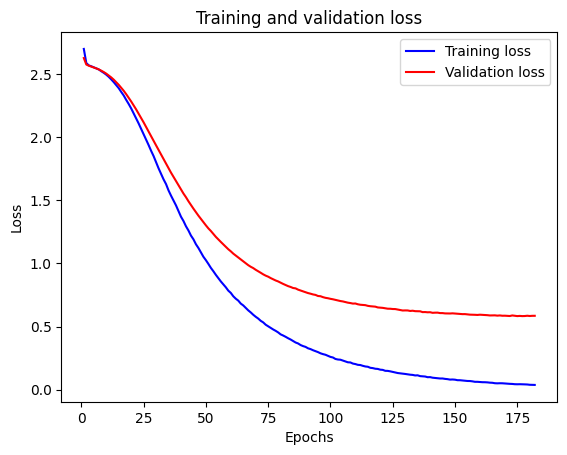

In [29]:
# ploting of loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

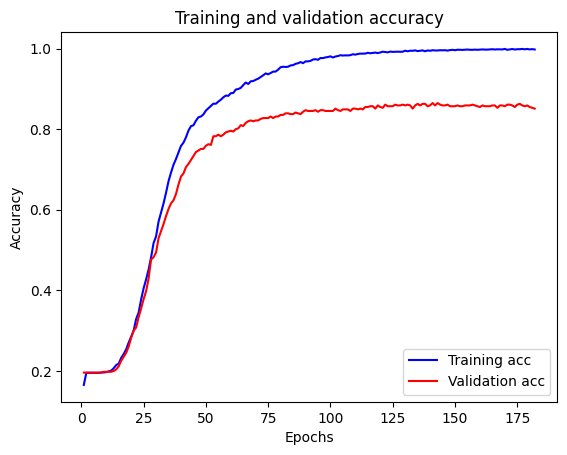

In [30]:
# plotting of accuracy
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

In [31]:
# creating the probability model for testing
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

# predicting test samples
predictions = probability_model.predict(raw_test_batch.map(vectorize_text))

16/16 [==============================] - 0s 1ms/step


In [45]:
# showing the first test sample result label
np.argmax(predictions[4])

8

In [44]:
# showing the true label of the first test sample
test_df.iloc[4]

text         ivation press bar row platform double handle i...
label                                          Health & Beauty
label_int                                                    8
Name: 2970, dtype: object

**Author:** https://farrokhkarimi.github.io/